In [1]:
##2020 nCOV analysis with data visualization

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
%matplotlib inline

In [53]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def getCSV ():
    global df
    
    import_file_path = filedialog.askopenfilename()
    df = pd.read_csv (import_file_path)
    print (df)
    
browseButton_CSV = tk.Button(text="      Import CSV File     ", command=getCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 150, window=browseButton_CSV)

root.mainloop()

In [19]:
df.head()


,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,2/1/2020 23:33,9074.0,NaN,215.0,294.0
1,Zhejiang,Mainland China,2/2/2020 2:13,661.0,NaN,23.0,0.0
2,Guangdong,Mainland China,2/2/2020 1:23,604.0,NaN,14.0,0.0
3,Henan,Mainland China,2/2/2020 0:53,493.0,NaN,4.0,2.0
4,Hunan,Mainland China,2/2/2020 1:53,463.0,NaN,8.0,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 7 columns):
Province/State    1028 non-null object
Country/Region    1323 non-null object
Last Update       1323 non-null object
Confirmed         1293 non-null float64
Suspected         88 non-null float64
Recovered         408 non-null float64
Death             270 non-null float64
dtypes: float64(4), object(3)
memory usage: 72.4+ KB


In [21]:
unique_dates = list(df['Last Update'].unique())
unique_dates.sort()
unique_dates

['1/21/2020',
 '1/22/2020 12:00',
 '1/23/20 12:00 PM',
 '1/24/2020 12:00 AM',
 '1/24/2020 12:00 PM',
 '1/24/2020 4:00 PM',
 '1/25/2020 10:00 PM',
 '1/25/2020 12:00 AM',
 '1/25/2020 12:00 PM',
 '1/26/2020 11:00 AM',
 '1/26/2020 23:00',
 '1/27/2020 19:00',
 '1/27/2020 20:30',
 '1/27/2020 9:00',
 '1/28/2020 13:00',
 '1/28/2020 18:00',
 '1/28/2020 23:00',
 '1/29/2020 13:30',
 '1/29/2020 14:30',
 '1/29/2020 21:00',
 '1/30/2020 11:00',
 '1/30/2020 21:30',
 '1/31/2020 10:37',
 '1/31/2020 14:00',
 '1/31/2020 15:20',
 '1/31/2020 16:13',
 '1/31/2020 17:00',
 '1/31/2020 19:00',
 '1/31/2020 8:15',
 '2/1/2020 10:00',
 '2/1/2020 10:33',
 '2/1/2020 10:43',
 '2/1/2020 10:53',
 '2/1/2020 11:03',
 '2/1/2020 11:53',
 '2/1/2020 13:33',
 '2/1/2020 14:03',
 '2/1/2020 14:23',
 '2/1/2020 15:23',
 '2/1/2020 15:43',
 '2/1/2020 15:53',
 '2/1/2020 17:43',
 '2/1/2020 18:12',
 '2/1/2020 18:33',
 '2/1/2020 18:53',
 '2/1/2020 19:43',
 '2/1/2020 19:53',
 '2/1/2020 1:52',
 '2/1/2020 23:33',
 '2/1/2020 23:43',
 '2/1/202

In [23]:
excess_dates = []
for i in range(len(unique_dates)):
    # assume the number of coronavirus cases, deaths, and recover increases over time 
    if i != 0:
        current_day_cases = df[df['Last Update']==unique_dates[i]].Confirmed.sum()
        prev_day_cases = df[df['Last Update']==unique_dates[i-1]].Confirmed.sum()
        current_day_deaths = df[df['Last Update']==unique_dates[i]].Death.sum()
        prev_day_deaths = df[df['Last Update']==unique_dates[i-1]].Death.sum()
        current_day_recovered = df[df['Last Update']==unique_dates[i]].Recovered.sum()
        prev_day_recovered = df[df['Last Update']==unique_dates[i-1]].Recovered.sum()
        
        if(current_day_cases < prev_day_cases or current_day_deaths < prev_day_deaths or current_day_recovered < prev_day_recovered):
            excess_dates.append(unique_dates[i])
            # swap the current date with the previous date, it will get removed later
            temp = unique_dates[i]
            unique_dates[i] = unique_dates[i-1]
            unique_dates[i-1] = temp
            
for i in excess_dates:
    unique_dates.remove(i)

In [24]:
world_cases = []

deaths = [] 
mortality_rate = []
recovered = [] 

for i in unique_dates:
    confirmed_sum = df[df['Last Update']==i].Confirmed.sum()
    death_sum = df[df['Last Update']==i].Death.sum()
    recovered_sum = df[df['Last Update']==i].Recovered.sum()
    world_cases.append(confirmed_sum)
    deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovered.append(recovered_sum)

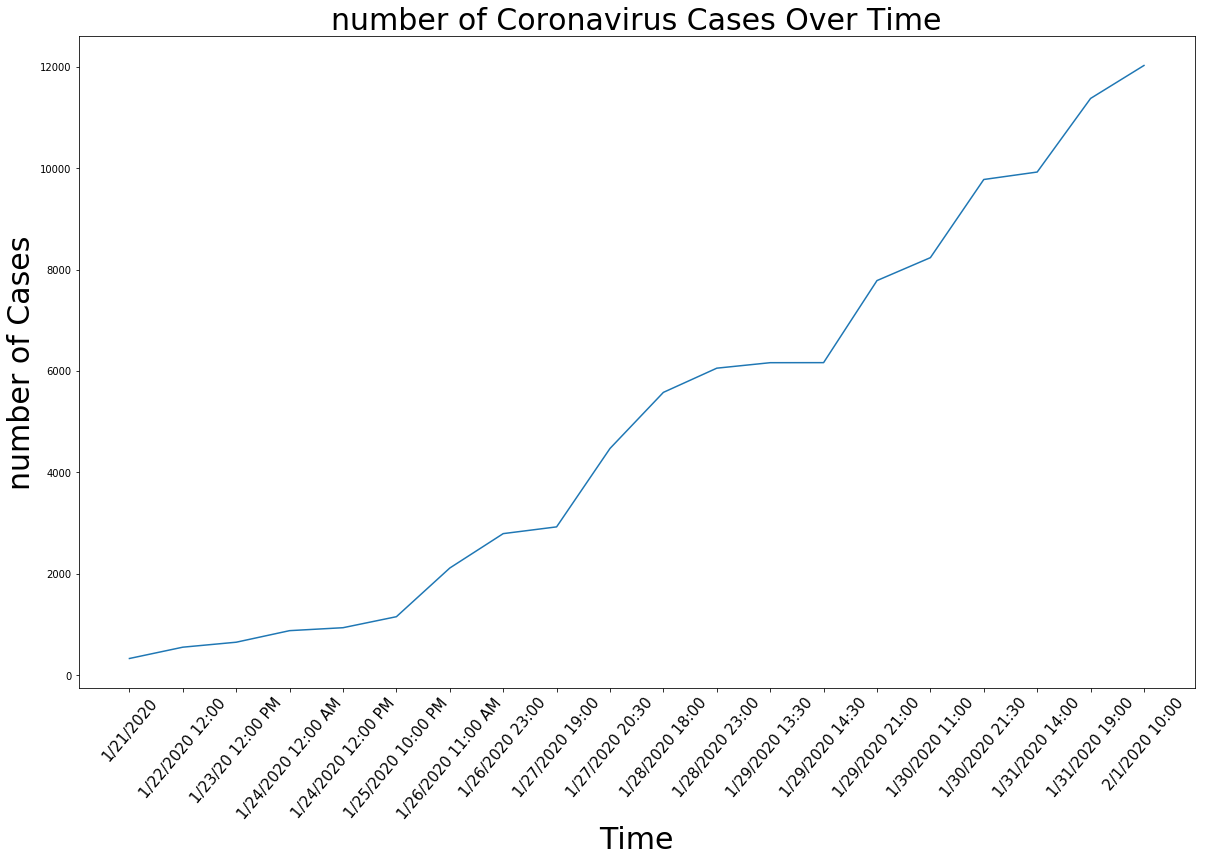

In [50]:
plt.figure(figsize=(20, 12))
plt.plot(unique_dates, world_cases)
plt.title('number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('number of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

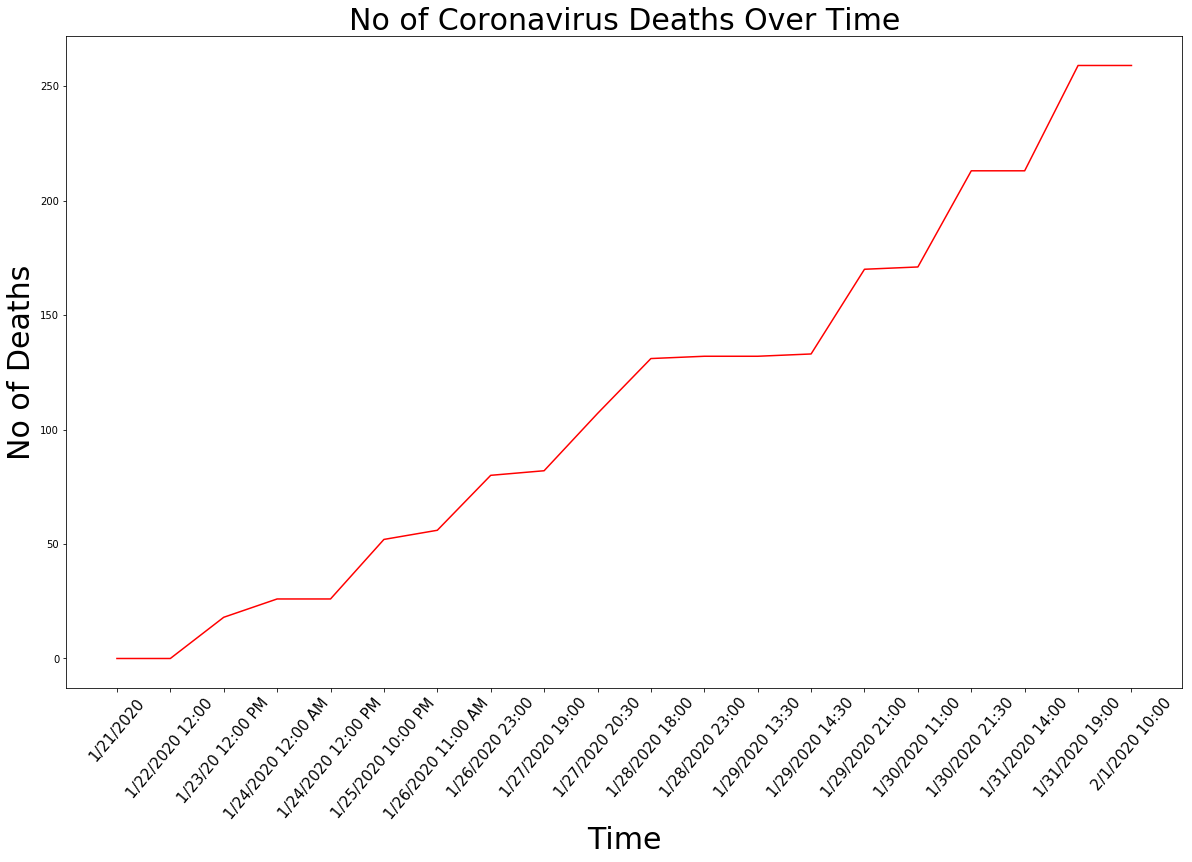

In [51]:
plt.figure(figsize=(20, 12))
plt.plot(unique_dates, deaths, color='red')
plt.title('No of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('No of Deaths', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

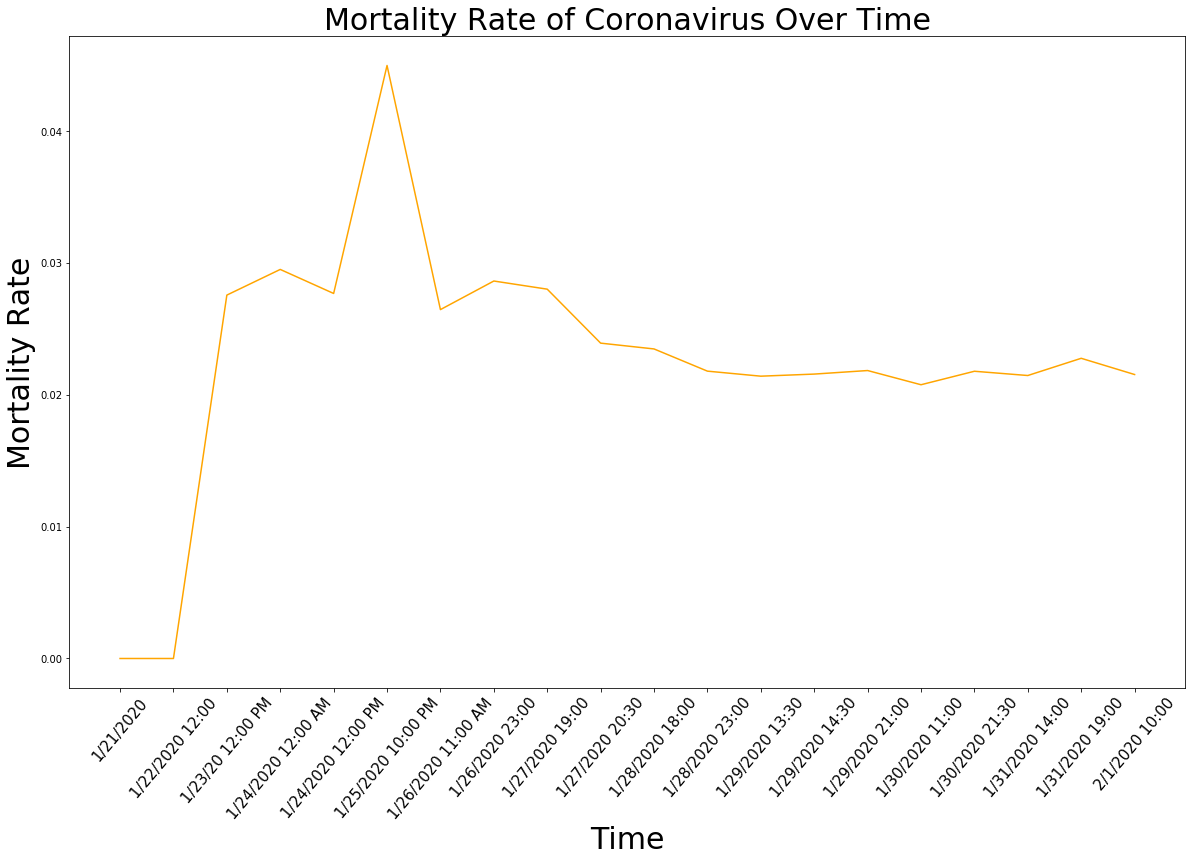

In [27]:
plt.figure(figsize=(20, 12))
plt.plot(unique_dates, mortality_rate, color='orange')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

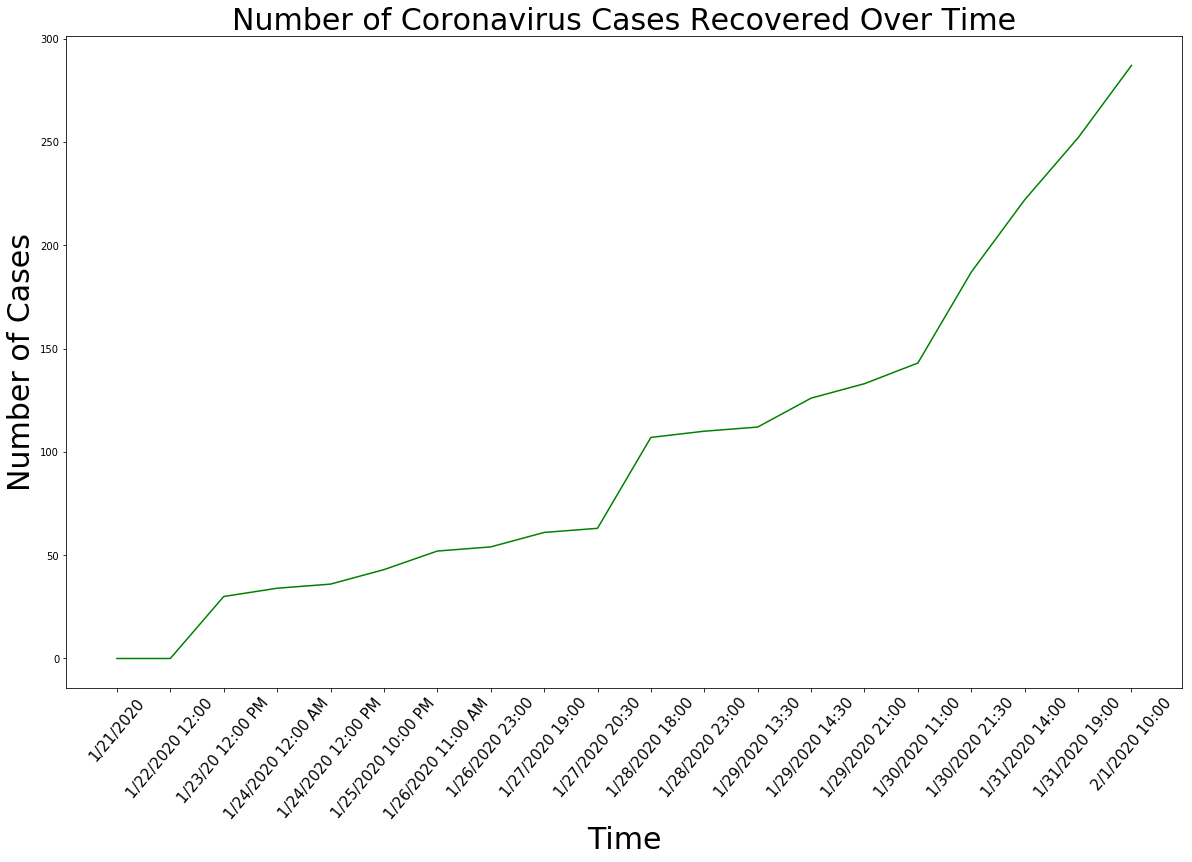

In [52]:
plt.figure(figsize=(20, 12))
plt.plot(unique_dates, recovered, color='green')
plt.title('Number of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

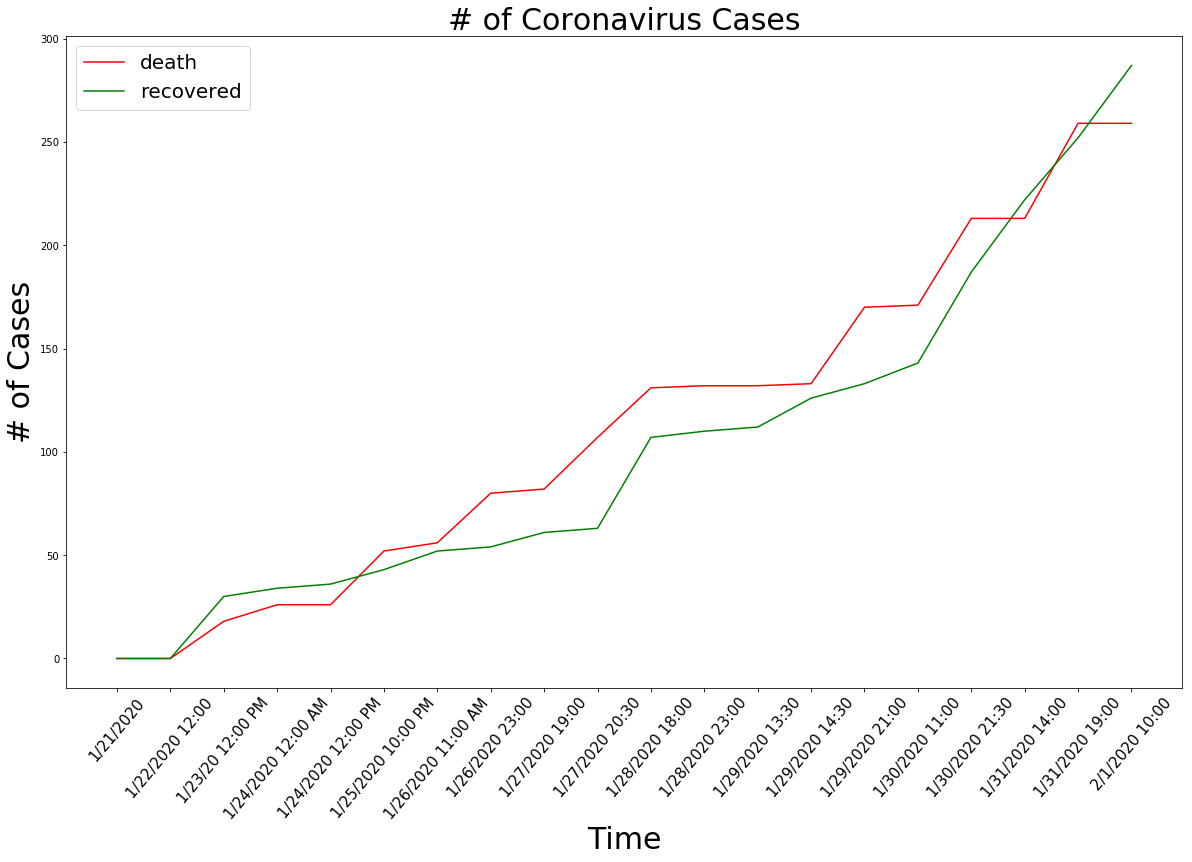

In [29]:
plt.figure(figsize=(20, 12))
plt.plot(unique_dates, deaths, color='red')
plt.plot(unique_dates, recovered, color='green')
plt.legend(['death', 'recovered'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

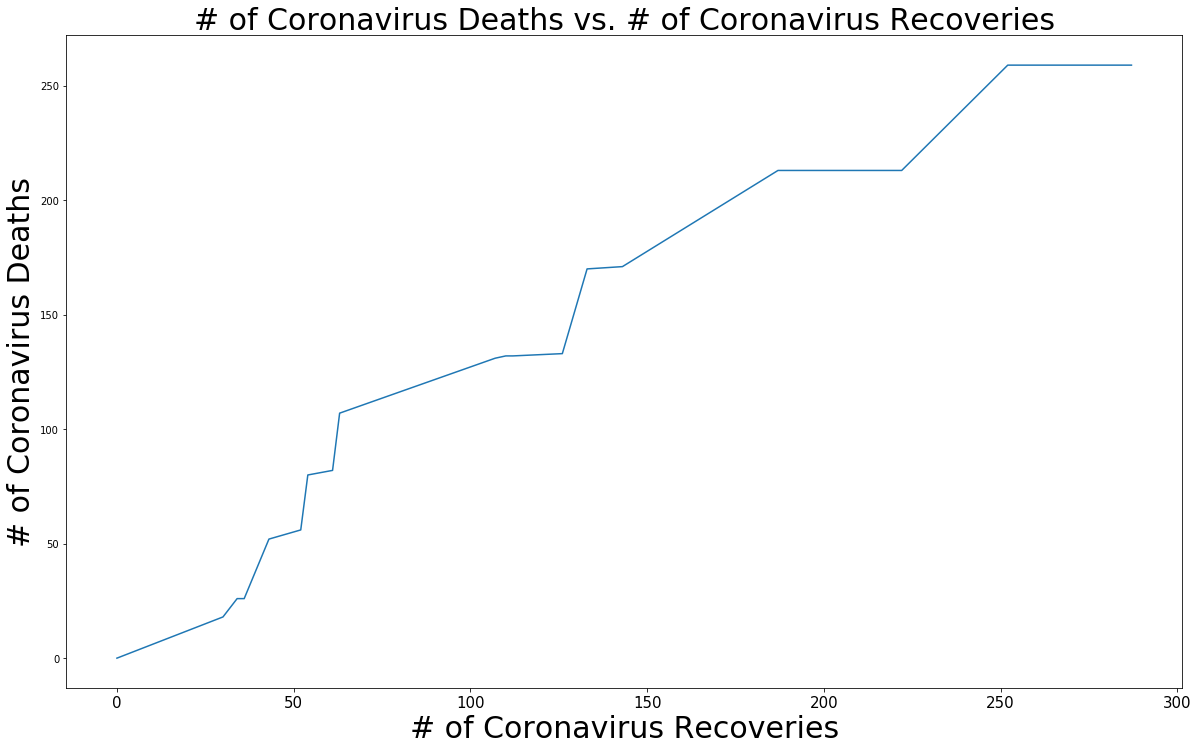

In [30]:
plt.figure(figsize=(20, 12))
plt.plot(recovered, deaths)
plt.title('No of Coronavirus Deaths vs. No of Coronavirus Recoveries', size=30)
plt.xlabel('No of Coronavirus Recoveries', size=30)
plt.ylabel('No of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.show()

In [31]:
latest_date = unique_dates[-1]
df[df['Last Update']==latest_date]

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
134,Hubei,Mainland China,2/1/2020 10:00,7153.0,NaN,168.0,249.0
135,Zhejiang,Mainland China,2/1/2020 10:00,599.0,NaN,21.0,NaN
136,Guangdong,Mainland China,2/1/2020 10:00,535.0,NaN,14.0,NaN
137,Henan,Mainland China,2/1/2020 10:00,422.0,NaN,3.0,2.0
138,Hunan,Mainland China,2/1/2020 10:00,389.0,NaN,8.0,NaN
139,Anhui,Mainland China,2/1/2020 10:00,297.0,NaN,5.0,NaN
140,Jiangxi,Mainland China,2/1/2020 10:00,286.0,NaN,9.0,NaN
141,Chongqing,Mainland China,2/1/2020 10:00,247.0,NaN,3.0,1.0
142,Sichuan,Mainland China,2/1/2020 10:00,207.0,NaN,3.0,1.0
143,Shandong,Mainland China,2/1/2020 10:00,206.0,NaN,3.0,NaN


In [33]:
# number of cases per province/state/city
unique_countries = df[df.Confirmed>0][df['Last Update']==latest_date]['Country/Region'].unique()
unique_countries.sort()
unique_countries

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


array(['Australia', 'Cambodia', 'Canada', 'Finland', 'France', 'Germany',
       'Hong Kong', 'India', 'Italy', 'Japan', 'Macau', 'Mainland China',
       'Malaysia', 'Nepal', 'Philippines', 'Russia', 'Singapore',
       'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Taiwan',
       'Thailand', 'UK', 'United Arab Emirates', 'United States',
       'Vietnam'], dtype=object)

In [36]:
country_confirmed_cases = []
for i in unique_countries:
    country_confirmed_cases.append(df[df.Confirmed>0][df['Last Update']==latest_date][df['Country/Region']==i][df['Last Update']==latest_date].Confirmed.sum())

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
unique_provinces =  df['Province/State'][df['Last Update']==latest_date][df.Confirmed > 0].unique()
unique_provinces

array(['Hubei', 'Zhejiang', 'Guangdong', 'Henan', 'Hunan', 'Anhui',
       'Jiangxi', 'Chongqing', 'Sichuan', 'Shandong', 'Jiangsu',
       'Shanghai', 'Beijing', 'Fujian', 'Shaanxi', 'Guangxi', 'Hebei',
       'Yunnan', 'Heilongjiang', 'Liaoning', 'Hainan', 'Shanxi',
       'Tianjin', 'Gansu', 'Guizhou', 'Ningxia', 'Inner Mongolia',
       'Xinjiang', 'Jilin', 'Hong Kong', 'Taiwan', 'Qinghai', 'Macau',
       'Tibet', 'Washington', 'Illinois', 'California', 'Arizona', nan,
       'Ontario', 'British Columbia', 'New South Wales', 'Victoria',
       'Queensland', 'South Australia', 'Bavaria'], dtype=object)

In [38]:
province_confirmed_cases = []
for i in unique_provinces:
    province_confirmed_cases.append(df[df.Confirmed>0][df['Province/State']==i][df['Last Update']==latest_date].Confirmed.sum())

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')
for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)


In [41]:
# number of cases per country/region
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Australia: 12.0 cases
Cambodia: 1.0 cases
Canada: 4.0 cases
Finland: 1.0 cases
France: 6.0 cases
Germany: 7.0 cases
Hong Kong: 13.0 cases
India: 1.0 cases
Italy: 2.0 cases
Japan: 17.0 cases
Macau: 7.0 cases
Mainland China: 11860.0 cases
Malaysia: 8.0 cases
Nepal: 1.0 cases
Philippines: 1.0 cases
Russia: 2.0 cases
Singapore: 18.0 cases
South Korea: 12.0 cases
Spain: 1.0 cases
Sri Lanka: 1.0 cases
Sweden: 1.0 cases
Taiwan: 10.0 cases
Thailand: 19.0 cases
UK: 2.0 cases
United Arab Emirates: 4.0 cases
United States: 7.0 cases
Vietnam: 6.0 cases


In [42]:
# number of cases per province/state/city

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Hubei: 7153.0 cases
Zhejiang: 599.0 cases
Guangdong: 535.0 cases
Henan: 422.0 cases
Hunan: 389.0 cases
Anhui: 297.0 cases
Jiangxi: 286.0 cases
Chongqing: 247.0 cases
Sichuan: 207.0 cases
Shandong: 206.0 cases
Jiangsu: 202.0 cases
Shanghai: 169.0 cases
Beijing: 168.0 cases
Fujian: 144.0 cases
Shaanxi: 101.0 cases
Guangxi: 100.0 cases
Hebei: 96.0 cases
Yunnan: 91.0 cases
Heilongjiang: 80.0 cases
Liaoning: 63.0 cases
Hainan: 62.0 cases
Shanxi: 47.0 cases
Tianjin: 38.0 cases
Gansu: 35.0 cases
Guizhou: 29.0 cases
Ningxia: 26.0 cases
Inner Mongolia: 23.0 cases
Xinjiang: 18.0 cases
Jilin: 17.0 cases
Hong Kong: 13.0 cases
Taiwan: 10.0 cases
Qinghai: 9.0 cases
Macau: 7.0 cases
Tibet: 1.0 cases
Washington: 1.0 cases
Illinois: 2.0 cases
California: 3.0 cases
Arizona: 1.0 cases
Ontario: 3.0 cases
British Columbia: 1.0 cases
New South Wales: 4.0 cases
Victoria: 4.0 cases
Queensland: 3.0 cases
South Australia: 1.0 cases
Bavaria: 7.0 cases


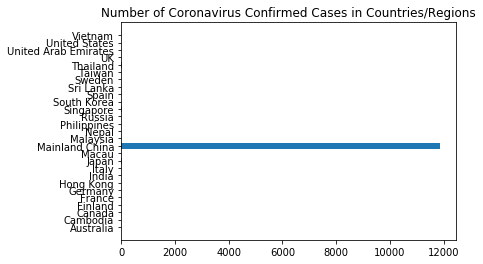

In [44]:
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Coronavirus Confirmed Cases in Countries/Regions')
plt.show()

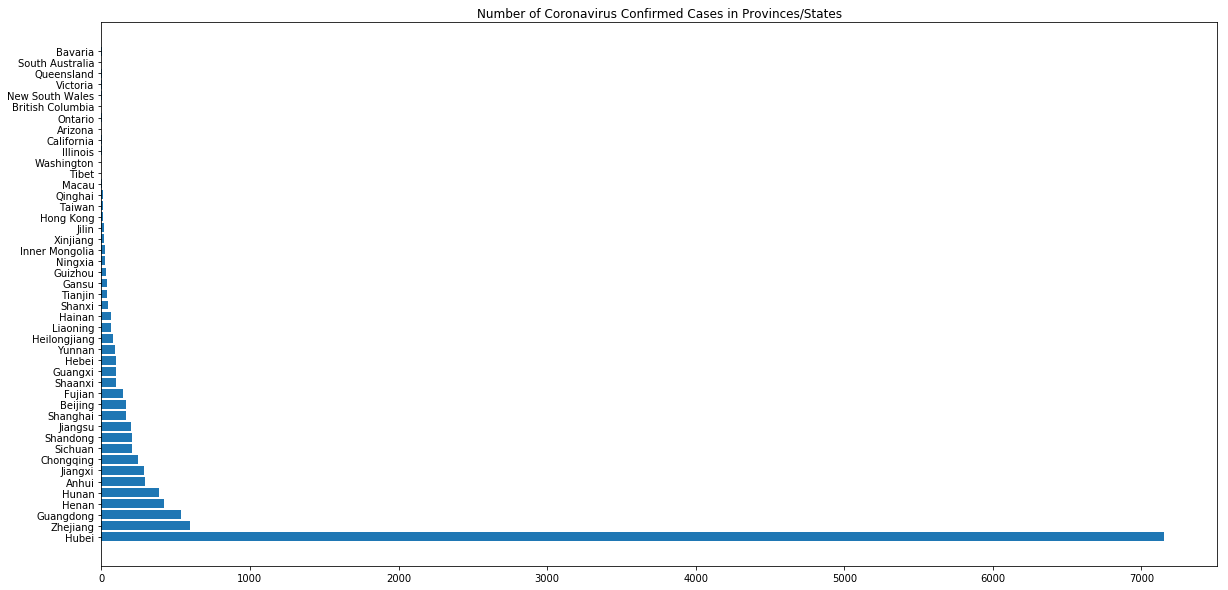

In [46]:
plt.figure(figsize=(20, 10))
plt.barh(unique_provinces, province_confirmed_cases)
plt.title('Number of Coronavirus Confirmed Cases in Provinces/States')
plt.show()

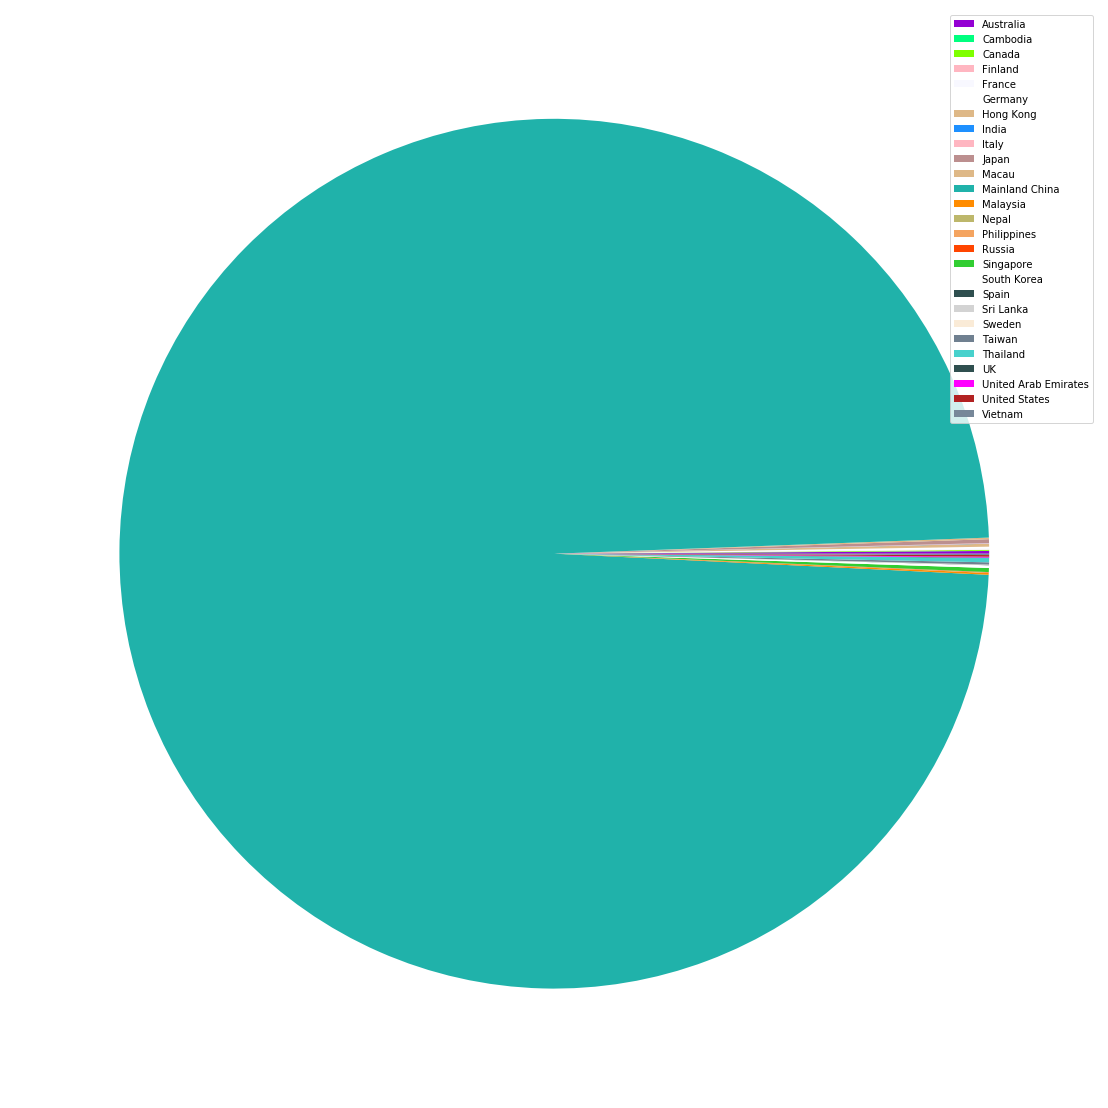

In [47]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.pie(country_confirmed_cases, colors=c)
plt.legend(unique_countries, loc='best')
plt.show()

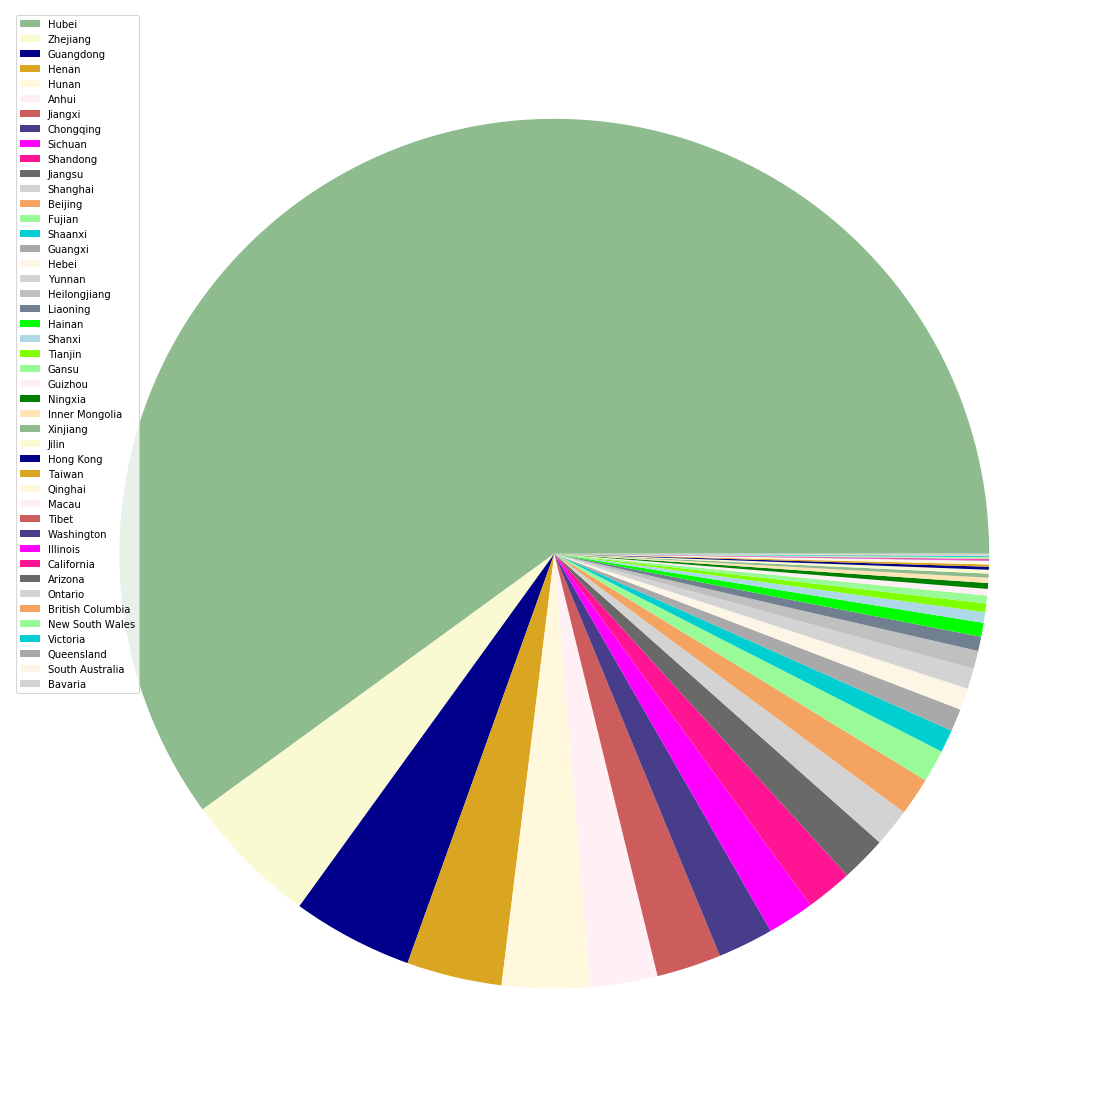

In [48]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.pie(province_confirmed_cases, colors=c)
plt.legend(unique_provinces, loc='best')
plt.show()